**`Функция потеря (loss function)`** : Функция, которая показывает насколько действительные значения откланяются от тех, что были созданы пробной функцией.

**`Регрессия`** : Способ выбрать функцию, что будет наилучшим(оптимальным) образом описывать точки. Лучшая - та что минимизирует функцию потерь, то есть значения ошибки будет минимально возможным в данной ситуации.

----
**`Линейная регрессия`** :  Линейная функция зависимости целевой переменной от одной или нескольких других переменных(предикторов)
$$
y = wX+b
$$

В случаи многомерной регресси, добавляется фиктивный столбец единиц $x_0$ и $b(w_0)$ рассчитывается как его коэффициент
$$
y = \theta_0X_0 + \theta_1X_1 + ... \theta_nX_n
$$
$$
y = \theta X
$$

$y$ - Целевое значение, которые необхидимо предсказать. (target)\
$X$ - Признаки включая фиктивный\
$w(\theta_i)$ - Вес при признаках. (Коэффициент наклона) (**coef_**)\
$b(\theta_0)$ - Свободный член. (Коэффициент сдвига) (**intercept_**) 

Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию, что наилучшим образом будет описывать заданную тенденцию.

Определить **loss-функцию** -> задать начальные параметры весов -> определить метод оптимизации -> минимизировать ошибку -> оценить по метрикам.

---

# Ordinary List Squares

**Метод наименьших квадратов** Аналитическое решение для задачи регрессии. \
Нормальное уравнение для нахождения коэффициентов линейной регрессии
$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$
- $\vec{w}$ – (искомый) вектор весов  
- $X$ – матрица признаков  
- $X^T$ – транспонированная матрица признаков  
- $\vec{y}$ – вектор целевых значений  
- ${}^{-1}$ – обратная матрица  

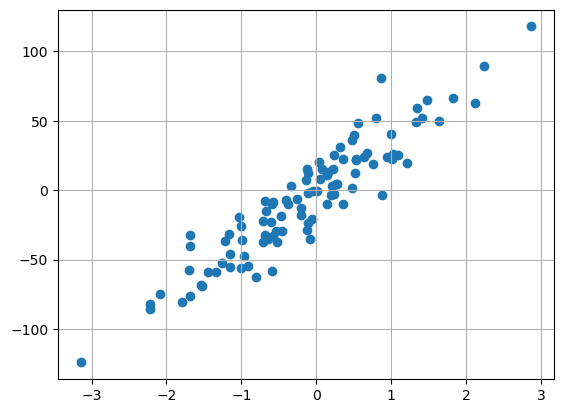

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=15, random_state=12)

plt.grid()
plt.scatter(X, y);

## Scikit-Learn

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

## Нормальное уравнение

**Добавление фиктивного столбца единиц**

In [20]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

**Проверка на выражденность**

In [21]:
# Проверка на выражденность
np.linalg.det(X.T@X)

10940.124282755105

**Нормальное уравнение**

In [22]:
OLS = np.linalg.inv(X.T@X)@X.T@y

In [28]:
intercept_, coef_ = OLS[0], OLS[1]

-----

In [31]:
coef_, intercept_

(37.73996473539595, -1.1588320019517484)

In [30]:
linreg.coef_, linreg.intercept_

(array([37.73996474]), -1.158832001951743)

# Singular Value Decomposition

Наиболее устойчивый способ решения задачи **МНК** способен обработать матрицу в случаи её вырожденности и мульиколлениарности.

**Сингулярное разложение**: Сингулярные числа - это корни из собственных значений матрицы $X^TX$. Это неотрицательные числа, которые указывают на "важность" или "влияние" соответствующих сингулярных векторов в разложении.
$$
X = USV^T
$$

$X$ - Исходная матрица признаков $m * n$\
$U$ - Ортнормальная матрица $m*m$. Матрица левых сингулярных векторов.\
$S$ - Диагональная матрица сингулярных векторов. $m*n$\
$V^T$ - Транспонированная ортнормальная матрица правых векторов $n*n$

----
Метод наименьших квадратов с сингулярным разложением выражается как
$$
\vec{w} = (X^T X)^{-1} X^T \vec{y}
$$
$$
X^T = (USV^T)^T = U^TS^TV
$$
$U$ - Ортоганальная матрица => $U^TU=I$ и остается
$$
X^TX = (U^TS^TV)(USV^T) = S^TVSV^T
$$
Обратная матрица: Поскольку $U$ и $V$ ортонормальные(ортогональные матрицы), то $Q^T=Q^{-1}$, значит $V^{-1}=V^T$ а $(V^T)^{-1}=V$
$$
(X^TX)^{-1} = (S^TVSV^T)^{-1} = V(S^TS)^{-1}V^T
$$
Подставляем в уравнение
$$
(X^TX)^{-1}X^T \vec{y} = V(S^TS)^{-1}V^TU^TS^TV\vec{y}
$$

$V^TV = I$ => они себя нейтрализуют о остается
$$
(X^TX)^{-1}X^T \vec{y} = V(S^TS)^{-1}U^TS^T\vec{y}
$$
$(S^TS)^{-1}$ - диагональная матрица её можно скомпоновать взяв **ПСЕВДООБРАТНУЮ**
$$
\vec{w} = (X^TX)^{-1}X^T \vec{y} = V^TS^+U^T\vec{y}
$$
$S^+$ - псевдообратная матрица $S$ (это матрица, которая инвертирует только ненулевые сингулярные значения).

## Выражденная матрица

In [44]:
x1 = np.arange(1, 101).reshape(-1, 1)
x2 = (x1*2).reshape(-1, 1)
x3 = (x2*3).reshape(-1, 1)
x4 = (x2*3 + x3*4).reshape(-1, 1)

X = np.hstack((x1, x2))
X = np.hstack((X, x3))
X = np.hstack((X, x4))

y = np.arange(1, 200, 2)
X.shape, y.shape

((100, 4), (100,))

## Scikit-Learn

In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

## OLS SVD

**Фиктивный столбец единиц**

In [46]:
ones = np.ones(X.shape[0]).reshape(-1, 1)
X = np.hstack((ones, X))

Детерминант равен нулю и ранг меньше количества столбцов => матрица **сингулярна**

In [47]:
print(f'Детерминант: {np.linalg.det(X.T@X)}\n'
      f'Ранг матрицы: {np.linalg.matrix_rank(X.T@X)}')

Детерминант: 0.0
Ранг матрицы: 2


**Нормальное уравнение**

In [66]:
OLS = np.linalg.inv(X.T@X)@X.T@y

LinAlgError: Singular matrix

### Сингулярное разложение

In [49]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

In [50]:
U.shape, S.shape, VT.shape

((100, 5), (5, 5), (5, 5))

#### Реконструкция

In [51]:
X_reconst = U@S@VT

In [53]:
X_reconst.shape, X.shape

((100, 5), (100, 5))

In [54]:
# Значения реконструированной матрицы
X_reconst[0:5]

array([[  1.,   1.,   2.,   6.,  30.],
       [  1.,   2.,   4.,  12.,  60.],
       [  1.,   3.,   6.,  18.,  90.],
       [  1.,   4.,   8.,  24., 120.],
       [  1.,   5.,  10.,  30., 150.]])

In [55]:
# Значения исходной матрицы
X[0:5]

array([[  1.,   1.,   2.,   6.,  30.],
       [  1.,   2.,   4.,  12.,  60.],
       [  1.,   3.,   6.,  18.,  90.],
       [  1.,   4.,   8.,  24., 120.],
       [  1.,   5.,  10.,  30., 150.]])

**Проверка на вырожденность**

Детерминант реконструированной матрицы уже не равен нулю, и матрица не является выражденной

In [59]:
np.linalg.det(X_reconst.T@X_reconst)

8.413674870724915e-20

-----

## Результаты

In [85]:
# Результат Sklearn-Модели
linreg.intercept_, linreg.coef_

(-1.0000000000000426, array([0.0021254 , 0.0042508 , 0.01275239, 0.06376196]))

In [83]:
# OLS с SVD
VT.T @ np.linalg.pinv(S) @ U.T @ y

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

In [99]:
# Псевдообратная исходная матрица
np.linalg.pinv(X)@y

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

In [100]:
# Псевдообратная реконструированная матрица
np.linalg.pinv(X_reconst) @ y

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

In [101]:
# OLS по реконструированной
np.linalg.pinv(X_reconst.T@X_reconst) @ X_reconst.T@y

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

In [102]:
# linalg - Метод наименьших квадратов
np.linalg.lstsq(X, y, rcond=1e-6)[0]

array([-1.        ,  0.0021254 ,  0.0042508 ,  0.01275239,  0.06376196])

# Градиентный спуск

## Градиентный спуск параболы

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
class ParabolGD:
    def __init__(self, X, point, eps=0.0001, learning_rate=0.1):
        self.X = X
        self.eps = eps
        self.learning_rate = learning_rate
        self.point = point
        self.__points_list = []
        
    def __func(self, x):
        return x**2
        
    def __grad(self, x):
        return 2*x
        
    def GD(self, logging=False):
        print(f'Стартовая точка: {point}')
        i = 1
        while True:
            next_point = self.point - self.__grad(self.point)*self.learning_rate\

            if logging:
                print(f'Итерация №{i}, текущая точка: {next_point}')
                print('------------------------------------------------')
            
            self.__points_list.append(self.point)
            if abs(self.point-next_point) <= self.eps:
                break
            self.point = next_point
            i+=1

        self.__points_list = np.array(self.__points_list)
        plt.grid()
        plt.scatter(self.__points_list, self.__func(self.__points_list), c='r')
        plt.plot(self.X, self.__func(self.X))
    

Стартовая точка: 79.79797979797982
Итерация №1, текущая точка: 63.838383838383855
------------------------------------------------
Итерация №2, текущая точка: 51.07070707070709
------------------------------------------------
Итерация №3, текущая точка: 40.85656565656567
------------------------------------------------
Итерация №4, текущая точка: 32.68525252525254
------------------------------------------------
Итерация №5, текущая точка: 26.148202020202028
------------------------------------------------
Итерация №6, текущая точка: 20.91856161616162
------------------------------------------------
Итерация №7, текущая точка: 16.734849292929297
------------------------------------------------
Итерация №8, текущая точка: 13.387879434343438
------------------------------------------------
Итерация №9, текущая точка: 10.71030354747475
------------------------------------------------
Итерация №10, текущая точка: 8.568242837979799
------------------------------------------------
Итерация №

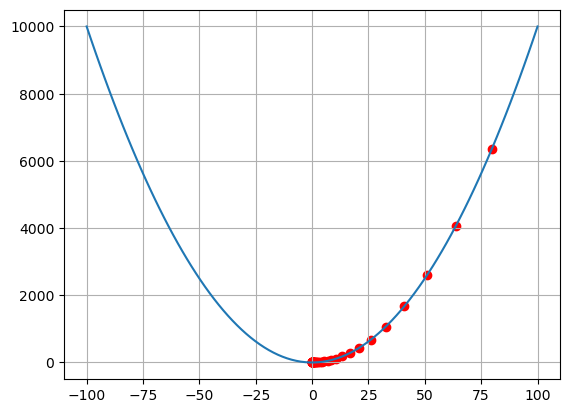

In [105]:
X = np.linspace(-100, 100, 100)
point = point = np.random.choice(X)

ParabolGD(X, point).GD(True)

## Gradient Descent MSE

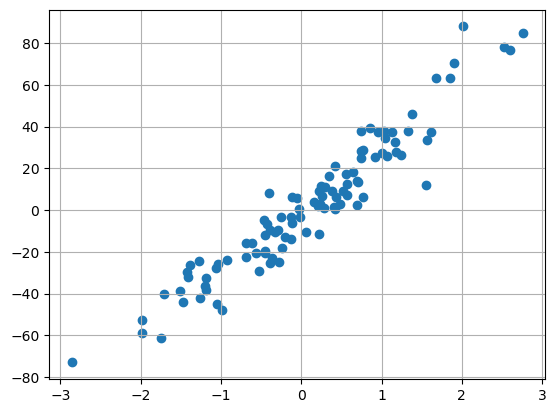

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=21)

plt.grid()
plt.scatter(X, y);

In [107]:
class GDRegression():
    def __init__(self, eps=0.0001, learning_rate=0.1):
        self.eps = eps
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = None

    @staticmethod
    def mserror(X, w, b, y):
        y_pred = w * X[:, 0] + b
        return np.sum((y - y_pred) ** 2) / len(y_pred)
    
    @staticmethod
    def grad(X, y, w, b):
        y_pred = w * X[:, 0] + b
        dw = 2/len(X)*np.sum((y - y_pred) * (-X[:, 0]))
        db = 2/len(X)*np.sum((y - y_pred)) * (-1)
        return np.array([dw, db])
        
    def fit(self, X, y, logging=False):
        w = 0
        b = 0
        
        next_w = w
        next_b = b

        i=0
        
        while True:
            cur_w = next_w
            cur_b = next_b
            
            next_b = cur_b - self.learning_rate * self.grad(X,y, cur_w, cur_b)[1]
            next_w = cur_w - self.learning_rate * self.grad(X,y, cur_w, cur_b)[0]
            
            if logging:
                print(f"Итерация: {i}")
                print(f"Текущая точка {cur_w, cur_b}| Следующая точка {next_b, next_w}")
                print(f"MSE {self.mserror(X, cur_w, cur_b, y)}")
                print("--------------------------------------------------------")
            
                i+=1
            if (abs(cur_w - next_w) <= self.eps) and (abs(cur_b - next_b) <= self.eps):
                break
            self.coef_ = next_w
            self.intercept_ = next_b

In [108]:
GD = GDRegression()
GD.fit(X, y, True)

Итерация: 0
Текущая точка (0, 0)| Следующая точка (0.47591397282289, 6.669703347380118)
MSE 1060.2664389253528
--------------------------------------------------------
Итерация: 1
Текущая точка (6.669703347380118, 0.47591397282289)| Следующая точка (0.7173544518830667, 11.79871781424048)
MSE 665.0897053875981
--------------------------------------------------------
Итерация: 2
Текущая точка (11.79871781424048, 0.7173544518830667)| Следующая точка (0.8033920244602116, 15.745540491677053)
MSE 431.94387303941477
--------------------------------------------------------
Итерация: 3
Текущая точка (15.745540491677053, 0.8033920244602116)| Следующая точка (0.7897962740986573, 18.784739225901923)
MSE 294.04977078371815
--------------------------------------------------------
Итерация: 4
Текущая точка (18.784739225901923, 0.7897962740986573)| Следующая точка (0.7154487674371603, 21.126701666318855)
MSE 212.27170135771897
--------------------------------------------------------
Итерация: 5
Текуща

## Результаты

In [110]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X, y)

SGDRegressor()

----

In [112]:
model.coef_, model.intercept_

(array([29.12724853]), array([-0.64878362]))

In [109]:
GD.coef_, GD.intercept_

(29.12073965311747, -0.660758579362936)

# Mini-batch Gradient descent

# Stochastic Gradient Descent